<a href="https://colab.research.google.com/github/Allzer/Python-develop/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B%20%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%BE%D0%B2%20%D1%81%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

In [2]:
user_m = 6
user_n = 6
user_min_limit = 1
user_max_limit = 12
mass = [[random.randint(user_min_limit, user_max_limit) for _ in range (0, user_n)] for _ in range (0, user_m)]
print(mass)
mass0 = mass[0]

[[7, 10, 4, 1, 11, 4], [3, 5, 3, 1, 4, 12], [6, 8, 6, 10, 6, 12], [8, 12, 4, 3, 4, 4], [10, 10, 1, 2, 4, 8], [5, 1, 5, 2, 6, 9]]


In [3]:
print(mass0)

[7, 10, 4, 1, 11, 4]


In [4]:
T_Selection = []
T_Insertion = []
T_Bubble = []
T_Shell = []
T_Quick = []
T_Tourn = []
T_Standard = []
N = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]
arr = copy.deepcopy(mass)

Сортировка выбором

In [5]:
def sort(mass): #сама функция
  for i in range(0,len(mass)): #цикл, который отвечает за перемещение по всем матрицам
    mass0 = mass[i] #смена индекса в матриц
    n = len(mass0) #переменная, которая отвечает за кол-во итераций (кол-во элементов в массиве)
    for i in range(n-1): #цикл отвечающий за смену "первого" индекса
      m = i #переменная в которую записывается первый индекс
      for j in range(i+1, n): #цикл отвечающий за "второй" индекс
        if mass0[j] < mass0[m]: #сравнение индексов
          m = j #если "второй" индекс меньше "первого", то мы меняем их местами
      mass0[i], mass0[m] = mass0[m], mass0[i] #меняем местами
  print(mass) #выводим отсортированную матрицу

st = time.time()
sort(mass) #вызываем функцию
print(f'время работы программы: {time.time()-st}')

[[1, 4, 4, 7, 10, 11], [1, 3, 3, 4, 5, 12], [6, 6, 6, 8, 10, 12], [3, 4, 4, 4, 8, 12], [1, 2, 4, 8, 10, 10], [1, 2, 5, 5, 6, 9]]
время работы программы: 0.0009317398071289062


Сортировка вставкой

In [6]:
def sort2(mass):
  for i in range(0,len(mass)): #цикл, который отвечает за перемещение по всем матрицам
      mass0 = mass[i] #смена индекса в матриц
      for i in range(1, len(mass0)):
            temp = mass0[i] #элемент с "первым" индексом
            j = i - 1 #индекс "нулевого" элемента массива
            while (j >= 0 and temp < mass0[j]): #пока "нулевой" элемент меньше "первого"
                mass0[j + 1] = mass0[j] #присваивыаем элементу, который идёт после j-итого эелмента значение элемента с индексом j
                j = j - 1
            mass0[j + 1] = temp
  print(mass)
st = time.time()
sort2(mass)
print(f'время работы программы: {time.time()-st}')

[[1, 4, 4, 7, 10, 11], [1, 3, 3, 4, 5, 12], [6, 6, 6, 8, 10, 12], [3, 4, 4, 4, 8, 12], [1, 2, 4, 8, 10, 10], [1, 2, 5, 5, 6, 9]]
время работы программы: 0.0016982555389404297


Сортировка обменом/пузырьком

In [7]:
def sort3(mass):
  for i in range(0,len(mass)): #цикл, который отвечает за перемещение по всем матрицам
      mass0 = mass[i] #смена индекса в матриц
      n=len(mass0) #колв-во итераций
      for i in range(n): #циул, чтобы пройтись по всем индексам массива
          for j in range(n-i-1): #цикл, чтобы сравнить два крайних элемента
              if mass0[j] > mass0[j+1]: #если элемент с меньшим индексом больше элемента с большим индексом, то мы меняем их местами
                 mass0[j], mass0[j+1] = mass0[j+1], mass0[j] #меняем местами
  print(mass)
st = time.time()
sort3(mass)
print(f'время работы программы: {time.time()-st}')

[[1, 4, 4, 7, 10, 11], [1, 3, 3, 4, 5, 12], [6, 6, 6, 8, 10, 12], [3, 4, 4, 4, 8, 12], [1, 2, 4, 8, 10, 10], [1, 2, 5, 5, 6, 9]]
время работы программы: 0.007801055908203125


Сортировка Шела

In [8]:
def sort4(mass):
  for i in range(0,len(mass)): #цикл, который отвечает за перемещение по всем матрицам
      mass0 = mass[i] #смена индекса в матриц
      n = len(mass0)
      d = int(math.log2(n))
      interval = 2**d -1 #интервал в которыом сравниваются элементы массива
      while interval > 0: #всё тоже самое, что и в сортировке вставкой
          for i in range(interval, n):
              temp = mass0[i]
              j = i
              while j >= interval and mass0[j - interval] > temp:
                  mass0[j] = mass0[j - interval]
                  j -= interval
              mass0[j] = temp
          d -= 1 #уменьшаем интервал сравнения
          interval = 2**d -1
  print(mass)
st = time.time()
sort4(mass)
print(f'время работы программы: {time.time()-st}')
#элемпенты сравниваются в определённом интервале (interval). Постепенно он уменьшается, пока не станет равным 1.
#после этого происходит обычная соритровка вставкой, но в разы быстрее т.к часть элементов уже отсортированы

[[1, 4, 4, 7, 10, 11], [1, 3, 3, 4, 5, 12], [6, 6, 6, 8, 10, 12], [3, 4, 4, 4, 8, 12], [1, 2, 4, 8, 10, 10], [1, 2, 5, 5, 6, 9]]
время работы программы: 0.002347230911254883


Быстрая сортировка

Алгоритм
Быстрая сортировка начинается с разбиения списка и выбора одного из элементов в качестве опорного. А всё остальное передвигаем так, чтобы этот элемент встал на своё место. Все элементы меньше него перемещаются влево, а равные и большие элементы перемещаются вправо.

In [9]:
def partition(nums, low, high):
    # Выбираем средний элемент в качестве опорного
    # Также возможен выбор первого, последнего
    # или произвольного элементов в качестве опорного
        pivot = nums[(low + high) // 2]
        i = low - 1
        j = high + 1
        while True:
            i += 1
            while nums[i] < pivot:
                i += 1
            j -= 1
            while nums[j] > pivot:
                j -= 1
            if i >= j:
                return j
            # Если элемент с индексом i (слева от опорного) больше, чем
            # элемент с индексом j (справа от опорного), меняем их местами
            nums[i], nums[j] = nums[j], nums[i]
def quick_sort(nums):
    # Создадим вспомогательную функцию, которая вызывается рекурсивно
    def _quick_sort(items, low, high):
        if low < high:
            # This is the index after the pivot, where our lists are split
            split_index = partition(items, low, high)
            _quick_sort(items, low, split_index)
            _quick_sort(items, split_index + 1, high)
    _quick_sort(nums, 0, len(nums) - 1)

def qsort(mass):
  for i in range(len(mass)):
    quick_sort(mass[i])

st = time.time()
qsort(mass)
print(mass)
print(f'время работы программы: {time.time()-st}')



[[1, 4, 4, 7, 10, 11], [1, 3, 3, 4, 5, 12], [6, 6, 6, 8, 10, 12], [3, 4, 4, 4, 8, 12], [1, 2, 4, 8, 10, 10], [1, 2, 5, 5, 6, 9]]
время работы программы: 0.0022759437561035156


Турнирная сортировка

In [10]:
def heapsort(alist):
    build_max_heap(alist)
    for i in range(len(alist) - 1, 0, -1):
        alist[0], alist[i] = alist[i], alist[0]
        max_heapify(alist, index=0, size=i)

def parent(i):
    return (i - 1)//2

def left(i):
    return 2*i + 1

def right(i):
    return 2*i + 2

def build_max_heap(alist):
    length = len(alist)
    start = parent(length - 1)
    while start >= 0:
        max_heapify(alist, index=start, size=length)
        start = start - 1

def max_heapify(alist, index, size):
    l = left(index)
    r = right(index)
    if (l < size and alist[l] > alist[index]):
        largest = l
    else:
        largest = index
    if (r < size and alist[r] > alist[largest]):
        largest = r
    if (largest != index):
        alist[largest], alist[index] = alist[index], alist[largest]
        max_heapify(alist, largest, size)

st = time.time()

def tsort(mass):
  for i in range(len(mass)):
    heapsort(mass[i])

tsort(mass)
print(mass)
print(f'время работы программы: {time.time()-st}')

[[1, 4, 4, 7, 10, 11], [1, 3, 3, 4, 5, 12], [6, 6, 6, 8, 10, 12], [3, 4, 4, 4, 8, 12], [1, 2, 4, 8, 10, 10], [1, 2, 5, 5, 6, 9]]
время работы программы: 0.003033876419067383


Стандартная сортировка

In [11]:
def StandardSort(mass):
  mass.sort()
  return arr
mas = copy.deepcopy(mass)
start_time = time.time()
StandardSort(mas)

[[7, 10, 4, 1, 11, 4],
 [3, 5, 3, 1, 4, 12],
 [6, 8, 6, 10, 6, 12],
 [8, 12, 4, 3, 4, 4],
 [10, 10, 1, 2, 4, 8],
 [5, 1, 5, 2, 6, 9]]

Строим графики

In [ ]:
for n in N:
  start = time.time()
  sort(mass)
  end = time.time()

  T_Selection.append((end - start)*1000)

  start = time.time()
  sort2(mass)
  end = time.time()

  T_Insertion.append((end - start)*1000)

  start = time.time()
  sort3(mass)
  end = time.time()

  T_Bubble.append((end - start)*1000)

  start = time.time()
  sort4(mass)
  end = time.time()

  T_Shell.append((end - start)*1000)

  start = time.time()
  qsort(mass)
  end = time.time()

  T_Quick.append((end - start)*1000)

  start = time.time()
  tsort(mass)
  end = time.time()

  T_Tourn.append((end - start)*1000)

  start = time.time()
  mass.sort()
  end = time.time()

  T_Standard.append((end - start)*1000)

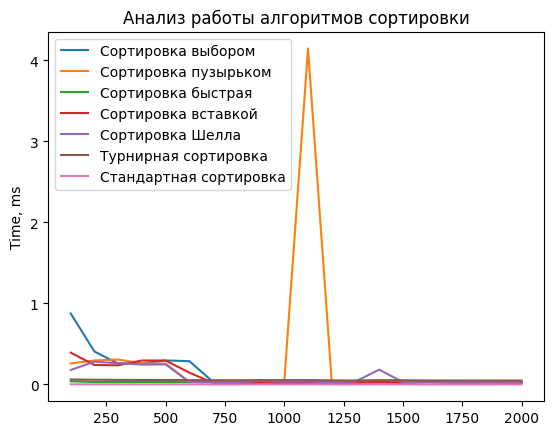

In [13]:
plt.plot(N, T_Selection, label = "Сортировка выбором")
plt.plot(N, T_Bubble, label = "Сортировка пузырьком")
plt.plot(N, T_Quick, label = "Сортировка быстрая")
plt.plot(N, T_Insertion, label = "Сортировка вставкой")
plt.plot(N, T_Shell, label = "Сортировка Шелла")
plt.plot(N, T_Tourn, label = "Турнирная сортировка")
plt.plot(N, T_Standard, label = "Cтандартная сортировка")



plt.ylabel('Sizeof Matrix')
plt.ylabel('Time, ms')
plt.title("Анализ работы алгоритмов сортировки")
plt.legend()
plt.show()